In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

In [2]:
# # connect to google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Load Dataset
data=pd.read_csv('data_email_campaign.csv')

In [4]:
# drop Email_ID column
data.drop('Email_ID',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Customer_Location          56758 non-null  object 
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  61528 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                66152 non-null  float64
 9   Total_Images               66676 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 5.7+ MB


In [6]:
column_names=data.columns
# Using SimpleImputer we impute null values with most_frequent value
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# convert to dataframe
data=pd.DataFrame(imp_most_frequent.fit_transform(data))
data.columns=column_names
data

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,2,2.1,1,G,2,15.0,2,504,5.0,0.0,0
2,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
68348,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,1,2.2,2,G,2,33.0,2,490,9.0,0.0,0
68351,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [7]:
data=data.convert_dtypes()

In [8]:
data.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

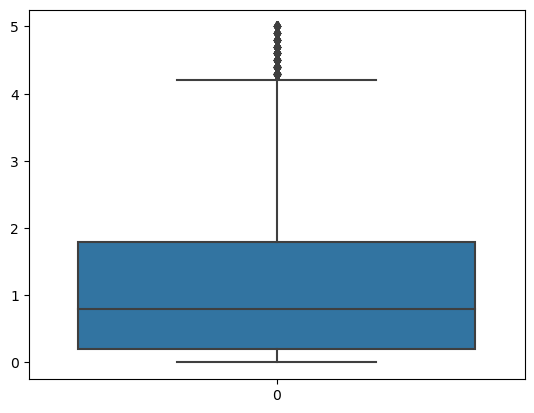

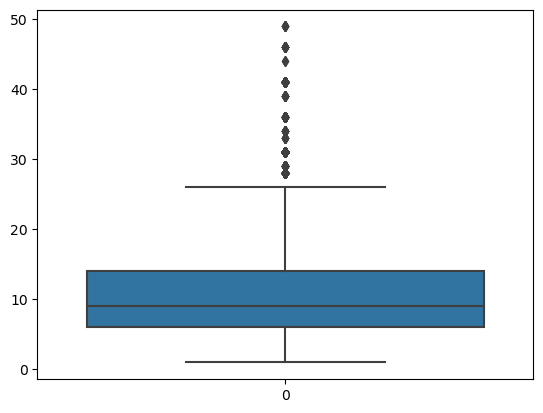

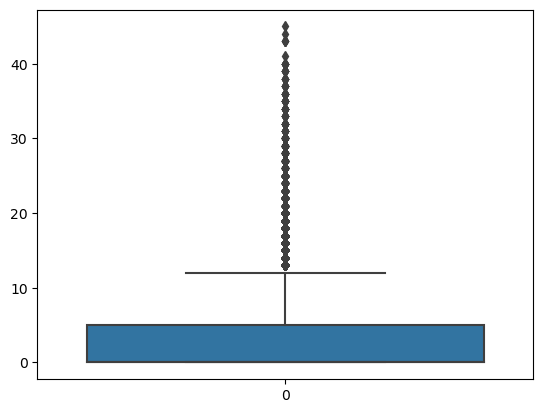

In [9]:
# visualize outliers
for col in ['Subject_Hotness_Score', 'Total_Links','Total_Images']:
  sns.boxplot(data[col])
  plt.show()

In [10]:
# remove outliers by the help of capping method
for col in ['Subject_Hotness_Score', 'Total_Links','Total_Images']:
  percentile25 = data[col].quantile(0.25)
  percentile75 = data[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  data[col] = np.where(
    data[col] > upper_limit,
    upper_limit,
    np.where(
        data[col] < lower_limit,
        lower_limit,
        data[col]
    )
  )

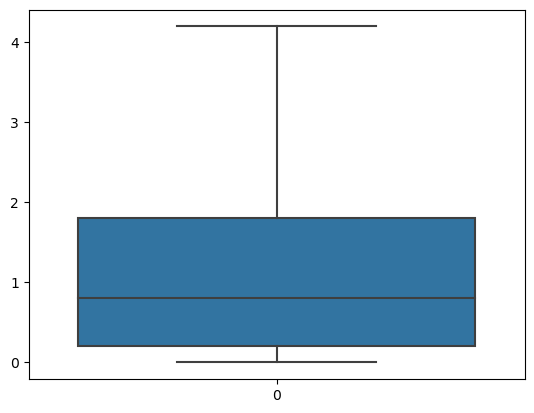

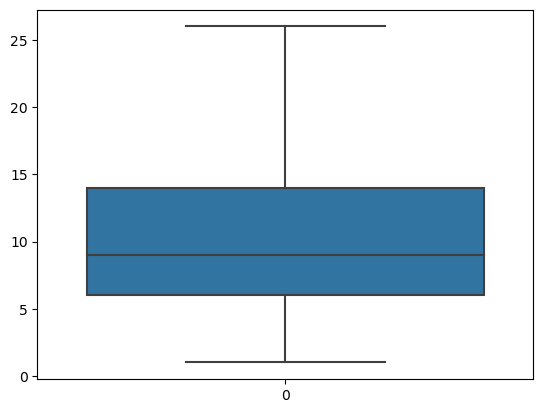

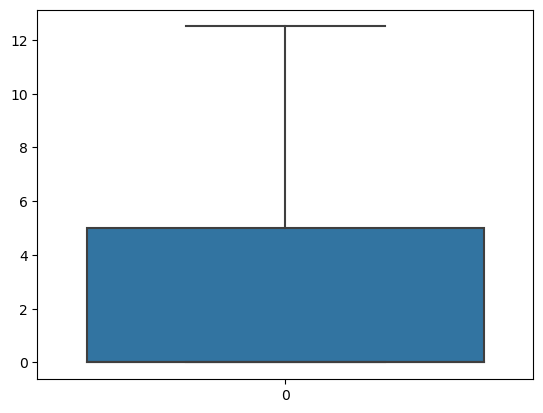

In [11]:
# visualize outliers after removeing outliers
for col in ['Subject_Hotness_Score', 'Total_Links','Total_Images']:
  sns.boxplot(data[col])
  plt.show()

In [12]:
# Data split
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images
23313,1,1.6,2,G,2,18,2,855,11,4
42457,2,0.0,2,C,3,53,2,694,6,4
6188,1,4.2,1,G,2,18,2,132,4,0
43598,1,0.5,1,G,2,51,2,578,26.0,12.5
48682,2,0.1,1,C,3,30,3,778,9,3
...,...,...,...,...,...,...,...,...,...,...
37194,1,2.8,2,G,2,10,2,700,9,4
6265,2,0.0,2,G,1,0,2,773,1,0
54886,1,0.9,2,E,2,38,1,721,16,12
860,1,3.1,2,G,2,23,3,366,8,0


In [15]:
CT=ColumnTransformer([
    ('tf1',OneHotEncoder(drop='first'),['Customer_Location']),
    ('tf2',StandardScaler(),['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images'])
],remainder='passthrough')

In [16]:
CT.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('tf1', OneHotEncoder(drop='first'),
                                 ['Customer_Location']),
                                ('tf2', StandardScaler(),
                                 ['Subject_Hotness_Score',
                                  'Total_Past_Communications', 'Word_Count',
                                  'Total_Links', 'Total_Images'])])

In [17]:
X_train=CT.transform(X_train)
X_test=CT.transform(X_test)

In [18]:
X_train.shape

(54682, 15)

In [19]:
# balanced data
st=SMOTE()

In [20]:
X_train_smote, y_train_smote = st.fit_resample(X_train,y_train)

In [21]:
# create functions for metrics
def print_metrics(y_te,y_pr):
  print('Accuracy score:',accuracy_score(y_te,y_pr))
  print('Precision score:',precision_score(y_te,y_pr,average='weighted'))
  print('Recall score:',recall_score(y_te,y_pr,average='weighted'))
  print('F1 score:',f1_score(y_te,y_pr,average='weighted'))
  print('Confusion matrix:\n',confusion_matrix(y_te,y_pr))
  print('Classification report:\n',classification_report(y_te,y_pr,target_names=['acknowledged', 'read', 'ignored']))

def plot_confusion_matrix(y_te,y_pr):
  sns.heatmap(confusion_matrix(y_te,y_pr),annot=True, fmt=".0f")
  plt.title('Confusion Matrix')
  plt.show()

In [22]:
# # ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# param_for_XGB={
#         'min_child_weight': [0,1, 5],
#         'gamma': [0.5, 1],
#         'subsample': [0.5,0.6, 0.8],
#         'colsample_bytree': [0.8,0.9],
#         'max_depth': [5,6]
#         }

XGB_for_gc=XGBClassifier()
gc_XGB=GridSearchCV(XGB_for_gc,{
        'min_child_weight': [0,1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.5,0.6, 0.8],
        'colsample_bytree': [0.8,0.9],
        'max_depth': [5,6]
        },n_jobs=-1,verbose=2,cv=5)
# Fit the Algorithm
gc_XGB.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0.5, 1],
                         'max_depth': [5, 6], 'min_child_weight': [0, 1, 5],
                         'subsample': [0.5, 0.6, 0.8]},
             verbose=2)

In [23]:
# Predict on the model
y_pred_for_gc_XGB=gc_XGB.predict(X_test)
print_metrics(y_test,y_pred_for_gc_XGB)

Accuracy score: 0.7990637115061078
Precision score: 0.7571592972207596
Recall score: 0.7990637115061078
F1 score: 0.7696908893250176
Confusion matrix:
 [[10380   489   113]
 [ 1621   500   111]
 [  275   138    44]]
Classification report:
               precision    recall  f1-score   support

acknowledged       0.85      0.95      0.89     10982
        read       0.44      0.22      0.30      2232
     ignored       0.16      0.10      0.12       457

    accuracy                           0.80     13671
   macro avg       0.48      0.42      0.44     13671
weighted avg       0.76      0.80      0.77     13671



In [24]:
gc_XGB.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.5,
 'max_depth': 6,
 'min_child_weight': 1,
 'subsample': 0.6}

In [25]:
# Predict on the model
print_metrics(y_test,y_pred_for_gc_XGB)

Accuracy score: 0.7990637115061078
Precision score: 0.7571592972207596
Recall score: 0.7990637115061078
F1 score: 0.7696908893250176
Confusion matrix:
 [[10380   489   113]
 [ 1621   500   111]
 [  275   138    44]]
Classification report:
               precision    recall  f1-score   support

acknowledged       0.85      0.95      0.89     10982
        read       0.44      0.22      0.30      2232
     ignored       0.16      0.10      0.12       457

    accuracy                           0.80     13671
   macro avg       0.48      0.42      0.44     13671
weighted avg       0.76      0.80      0.77     13671



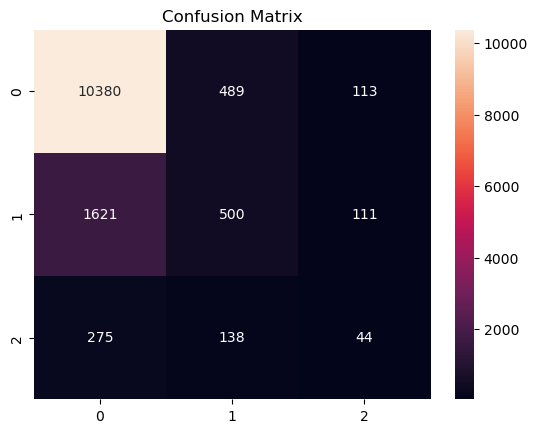

In [26]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(y_test,y_pred_for_gc_XGB)

In [27]:
pickle.dump(CT,open('CT.pickle','wb'))

In [34]:
pickle.dump(gc_XGB,open('model.pickle','wb'))